In [1]:
from agents import ConsumerProducer, Influencer, ImperfectConsumerProducer
from content_market import ContentMarket
import numpy as np
from stats import TestStats

In [2]:
num_influencers = 1
num_consumer_producers = 15

production_rate = 1
external_production_rate = 1

topics = [[-1, 1]]
topics = np.array(topics)

In [3]:
content_market = ContentMarket(topics, production_rate, external_production_rate)

In [4]:
from util import exponential_decay, inverse_decay, tanh_decay

In [5]:
agent_colors = dict()

for i in range(num_consumer_producers):
    cons_func = lambda x: inverse_decay(x, 1, 2)
    prod_func = lambda x: inverse_decay(x, 1, 2)
    consumer_producer = ConsumerProducer(prod_func, cons_func, 20, 3, 1, init_following_rates_method='equal')
    #consumer_producer = ImperfectConsumerProducer(prod_func, cons_func, 10, 3, 1, init_following_rates_method='equal')
    content_market.add_agent(consumer_producer)

    color = np.random.rand(3,)
    agent_colors[consumer_producer.index] = color

for i in range(num_influencers):
    influencer = Influencer(40, 1, init_following_rates_method='equal')
    content_market.add_agent(influencer)

    color = np.random.rand(3,)
    agent_colors[influencer.index] = color

In [6]:
import matplotlib.pyplot as plt
import visualize

In [7]:
content_market.finalize(method='even')

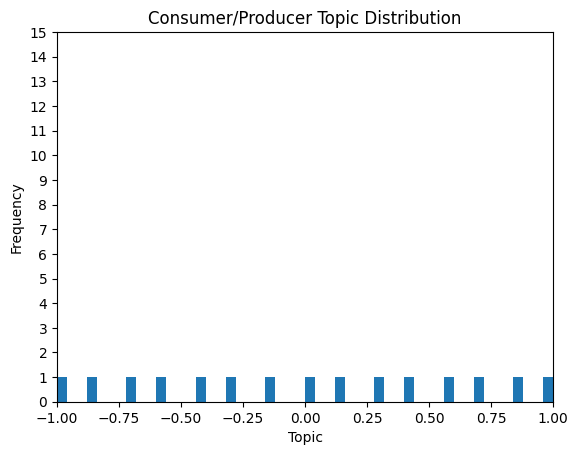

In [8]:
visualize.plot_topic_distribution_histogram("Consumer/Producer Topic Distribution", content_market.consumers, -1, 1)

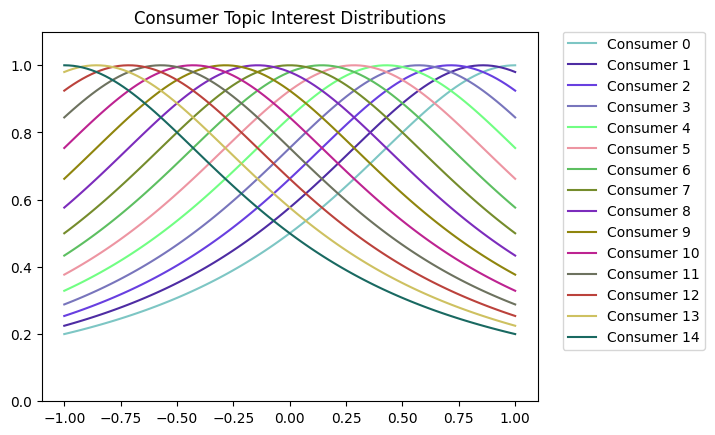

In [9]:
visualize.plot_consumer_topic_interest_distributions("Consumer Topic Interest Distributions", content_market.consumers, -1, 1, agent_colors)

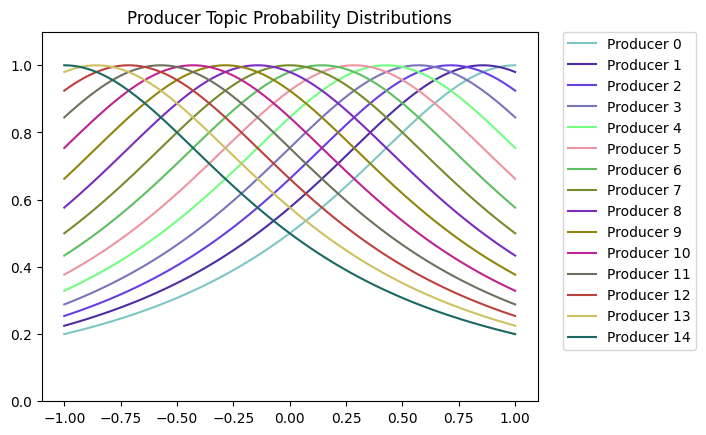

In [10]:
visualize.plot_producer_topic_probability_distributions("Producer Topic Probability Distributions", content_market.producers, -1, 1, agent_colors)

In [11]:
stats: TestStats = content_market.optimize(100, topic_position='farthest')

Optimizing consumer 0
Optimizing consumer 1
Optimizing consumer 2
Optimizing consumer 3
Optimizing consumer 4
Optimizing consumer 5
Optimizing consumer 6
Optimizing consumer 7
Optimizing consumer 8
Optimizing consumer 9
Optimizing consumer 10
Optimizing consumer 11
Optimizing consumer 12
Optimizing consumer 13
Optimizing consumer 14
Optimizing influencer 15
Optimizing producer 0
Optimization succeeded (overall 0.6637429160764441s): nit=100, nfev=1228, njev=614.
Optimizing producer 1
Optimization succeeded (overall 0.562953417073004s): nit=100, nfev=1184, njev=592.
Optimizing producer 2
Optimization succeeded (overall 0.5997630840865895s): nit=100, nfev=1236, njev=618.
Optimizing producer 3
Optimization succeeded (overall 0.5834181669633836s): nit=100, nfev=1224, njev=612.
Optimizing producer 4
Optimization succeeded (overall 0.58772441605106s): nit=100, nfev=1226, njev=613.
Optimizing producer 5
Optimization succeeded (overall 0.6075595829170197s): nit=100, nfev=1178, njev=589.
Optimiz

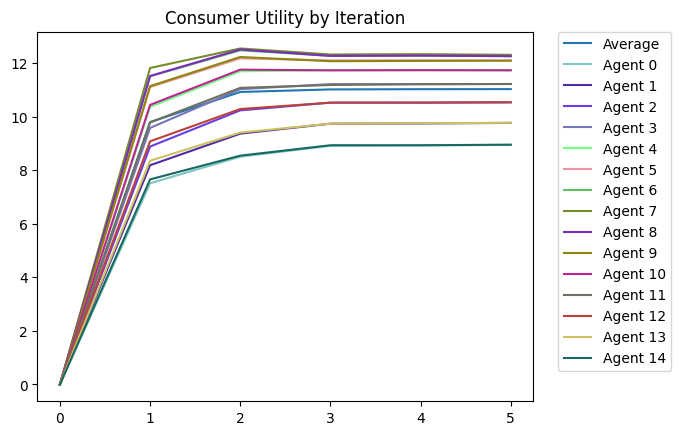

In [12]:
visualize.plot_agent_utility_by_iteration("Consumer Utility by Iteration", content_market.consumers, agent_colors, stats.consumer_stats, stats.average_consumer_utility)

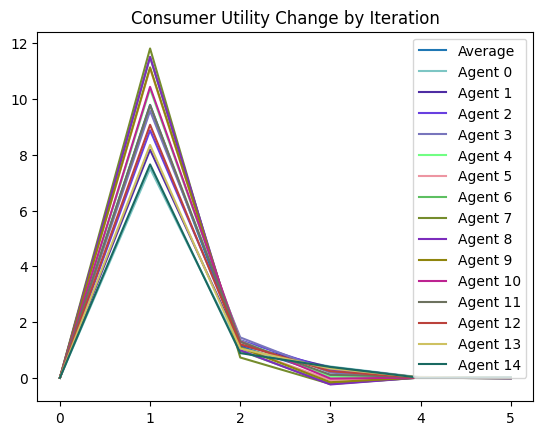

In [13]:
visualize.plot_agent_utility_change_by_iteration("Consumer Utility Change by Iteration", content_market.consumers, agent_colors, stats.consumer_stats, stats.average_consumer_utility_change)

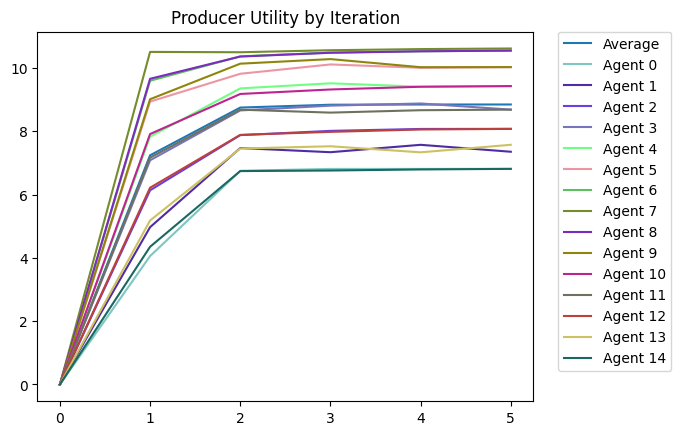

In [14]:
visualize.plot_agent_utility_by_iteration("Producer Utility by Iteration", content_market.producers, agent_colors, stats.producer_stats, stats.average_producer_utility)

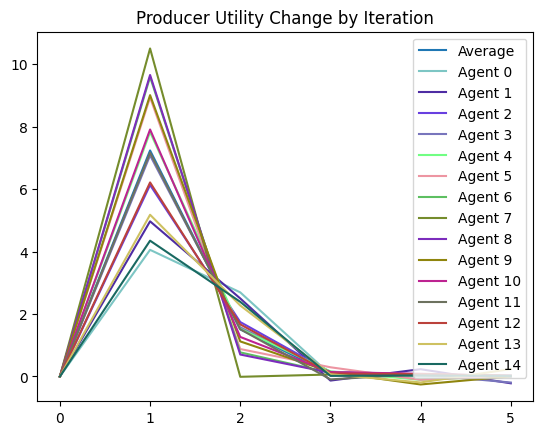

In [15]:
visualize.plot_agent_utility_change_by_iteration("Producer Utility Change by Iteration", content_market.producers, agent_colors, stats.producer_stats, stats.average_producer_utility_change)

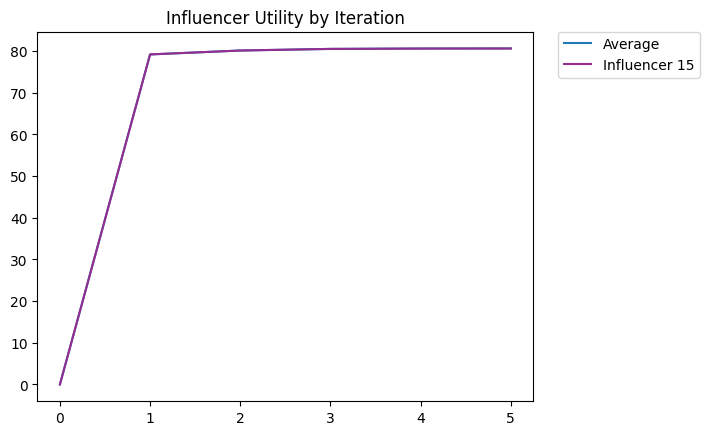

In [16]:
visualize.plot_agent_utility_by_iteration("Influencer Utility by Iteration", content_market.influencers, agent_colors, stats.influencer_stats, stats.average_influencer_utility)

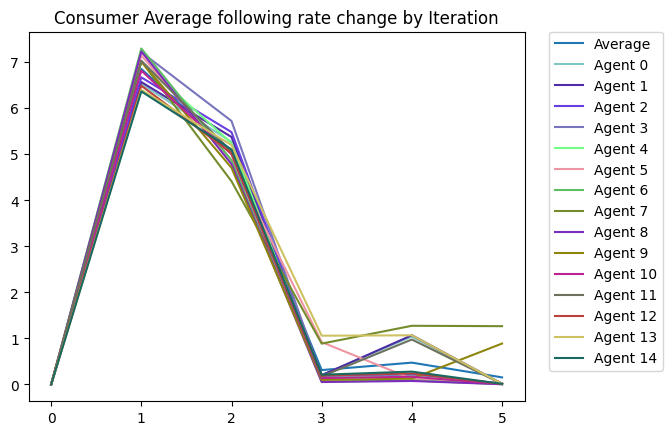

In [17]:
visualize.plot_following_rate_change_by_iteration("Consumer Average following rate change by Iteration", content_market.consumers, agent_colors, stats.consumer_stats, stats.average_consumer_rate_change)

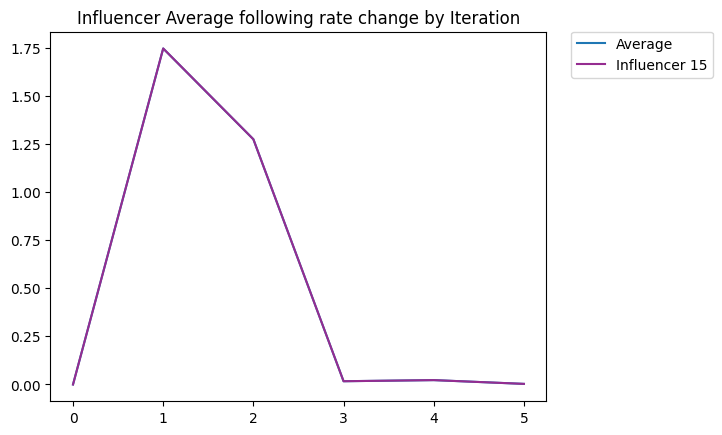

In [18]:
visualize.plot_following_rate_change_by_iteration("Influencer Average following rate change by Iteration", content_market.influencers, agent_colors, stats.influencer_stats, stats.average_influencer_rate_change)

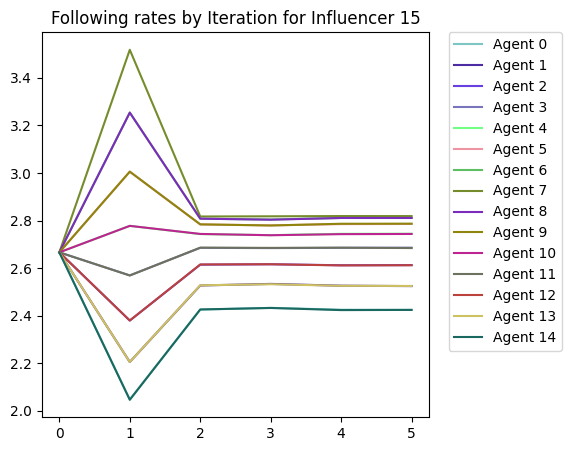

In [19]:
visualize.plot_following_rates_by_iteration(content_market.influencers, content_market.producers, agent_colors, stats.influencer_stats)

In [20]:
import importlib
importlib.reload(visualize)

<module 'visualize' from '/Users/gabeguralnick/git/content-market-experiment/visualize.py'>

In [21]:
content_market.influencers[0].get_following_rate_vector()

array([2.42499264, 2.52476347, 2.61302091, 2.68634352, 2.74495328,
       2.78600267, 2.811264  , 2.81906559, 2.81116107, 2.78717297,
       2.74396651, 2.68473496, 2.61253653, 2.52534795, 2.42467391,
       0.        , 0.        ])

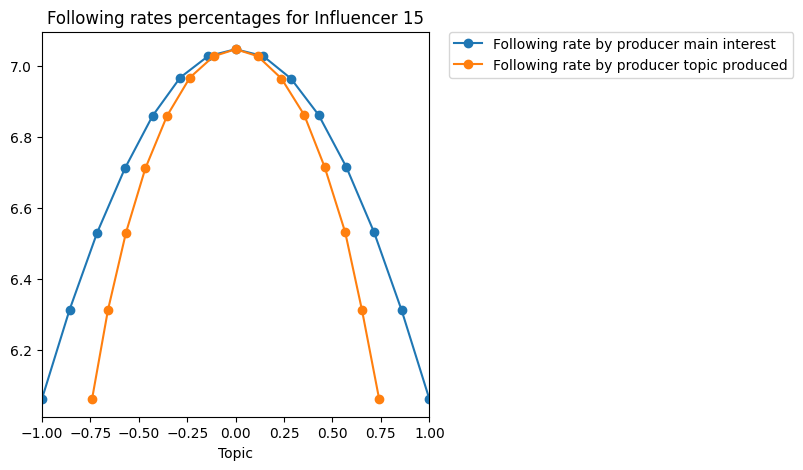

In [22]:
visualize.plot_agent_following_rates(content_market.influencers, stats.influencer_stats, agent_colors)

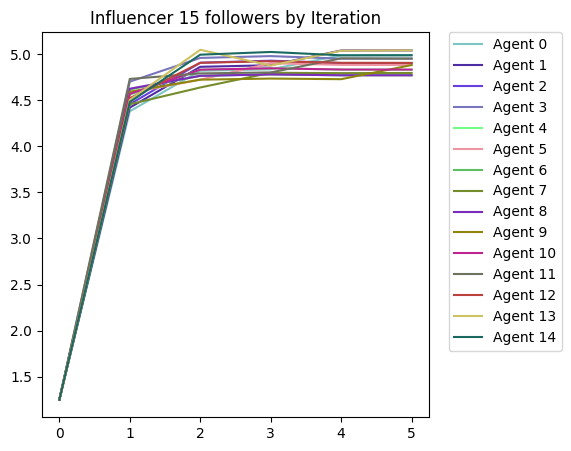

In [23]:
visualize.plot_follows_by_iteration(content_market.influencers, content_market.consumers, agent_colors, stats.consumer_stats)

In [42]:
[p.topic_produced for p in content_market.producers]

[array([0.74080789]),
 array([0.65261375]),
 array([0.56541426]),
 array([0.45958526]),
 array([0.35420654]),
 array([0.2368449]),
 array([0.11400916]),
 array([0.00036597]),
 array([-0.11333168]),
 array([-0.23577669]),
 array([-0.35395033]),
 array([-0.46591734]),
 array([-0.56558124]),
 array([-0.6586536]),
 array([-0.7410458])]

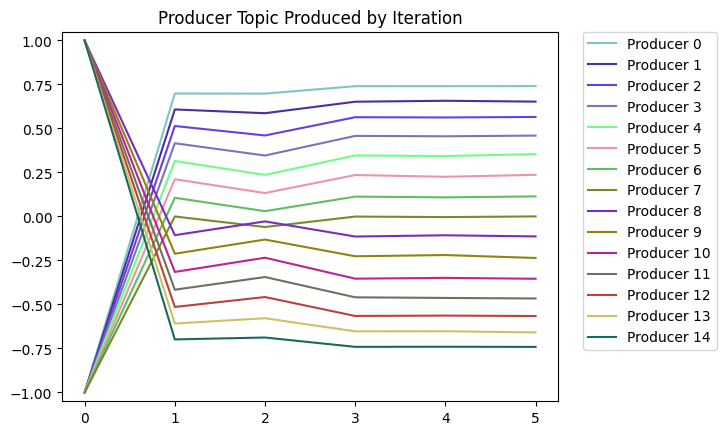

In [24]:
visualize.plot_producer_topic_produced_by_iteration("Producer Topic Produced by Iteration", content_market.producers, content_market.consumers, agent_colors, stats.producer_stats, False)

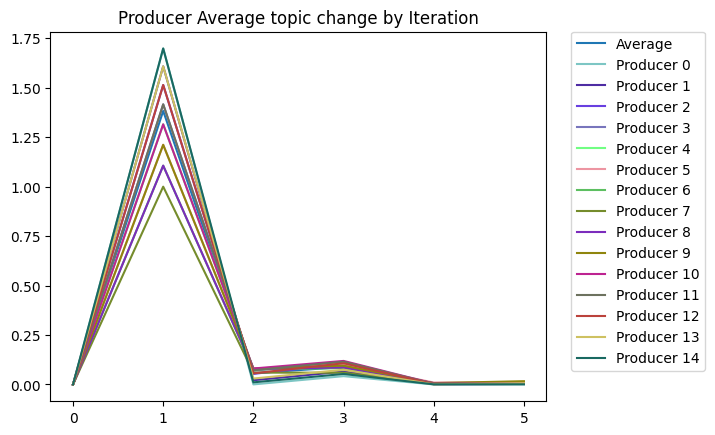

In [25]:
visualize.plot_producer_topic_change_by_iteration("Producer Average topic change by Iteration", content_market.producers, agent_colors, stats.producer_stats, stats.average_producer_topic_change)

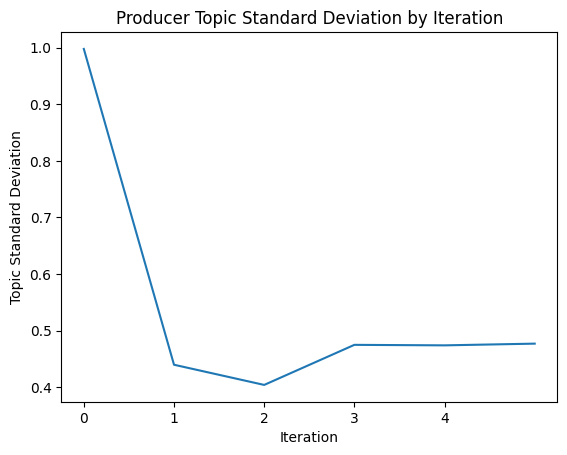

In [26]:
visualize.plot_value_by_iteration("Producer Topic Standard Deviation by Iteration", stats, "producer_topic_standard_deviation", "Topic Standard Deviation")

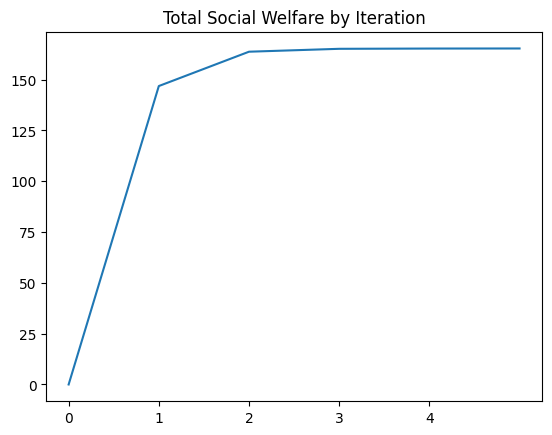

In [27]:
visualize.plot_total_social_welfare_by_iteration("Total Social Welfare by Iteration", stats)

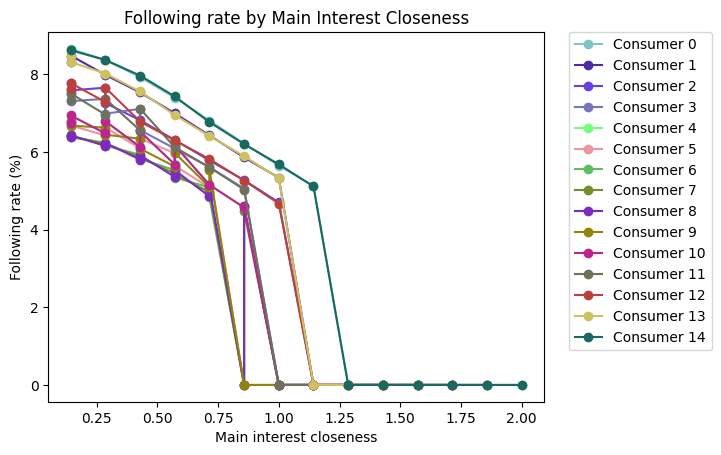

In [28]:
#averages = ([x[0] for x in stats.average_following_rate_by_main_interest_closeness], [x[1] for x in stats.average_following_rate_by_main_interest_closeness])
visualize.plot_following_rate_by_main_interest_closeness("Following rate by Main Interest Closeness", content_market.consumers, content_market.producers, agent_colors, stats.consumer_stats) #averages=averages)

In [29]:
import importlib
importlib.reload(visualize)

<module 'visualize' from '/Users/gabeguralnick/git/content-market-experiment/visualize.py'>

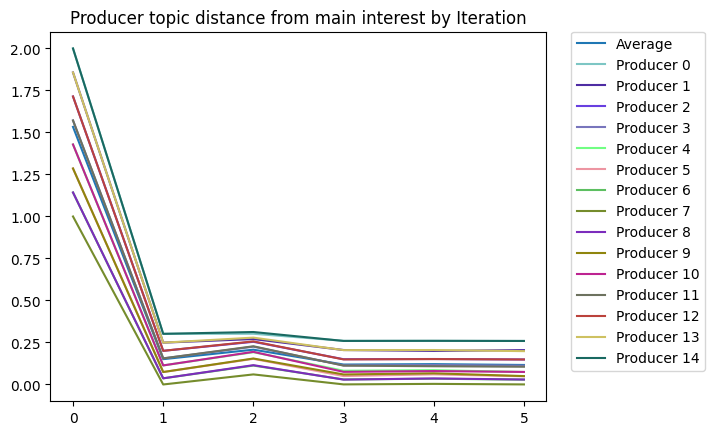

In [30]:
visualize.plot_producer_topic_distance_from_main_interest_by_iteration("Producer topic distance from main interest by Iteration", content_market.producers, agent_colors, stats.producer_stats, stats.average_producer_topic_distance_from_main_interest)

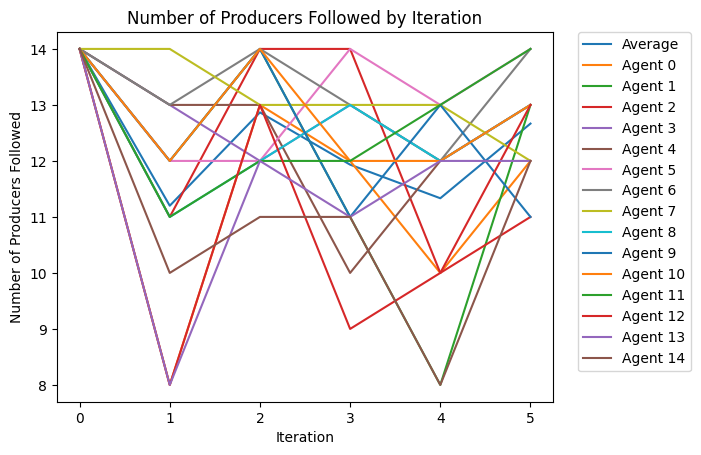

In [31]:
visualize.plot_value_by_agent_by_iteration("Number of Producers Followed by Iteration", stats.consumer_stats, "num_producers_followed", "Number of Producers Followed", stats.average_consumer_num_producers_followed)

[[ 1.         -0.27097187]
 [-0.27097187  1.        ]]


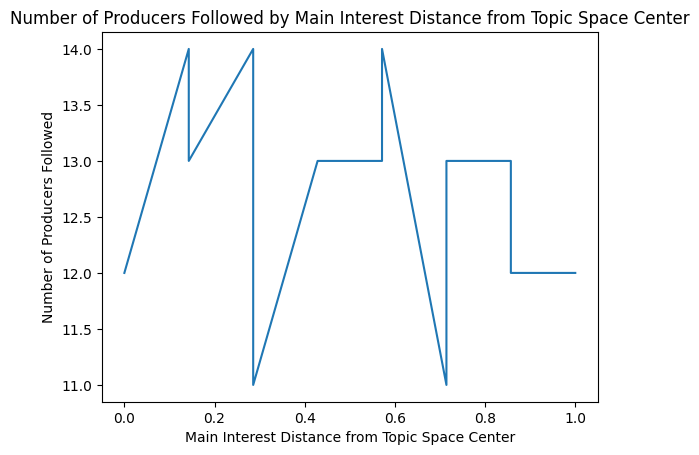

In [32]:
num_prods_by_main_interest_magnitude = []
topic_center = np.array([(bound[0] + bound[1]) / 2 for bound in content_market.topics_bounds])

for consumer in content_market.consumers:
    main_interest_mag = np.linalg.norm(consumer.main_interest - topic_center)
    num_prods_by_main_interest_magnitude.append((main_interest_mag, stats.consumer_stats[consumer.index].num_producers_followed[-1]))

print(np.corrcoef([x[0] for x in num_prods_by_main_interest_magnitude], [x[1] for x in num_prods_by_main_interest_magnitude]))
num_prods_by_main_interest_magnitude.sort(key=lambda x: x[0])
plt.figure()
plt.plot([x[0] for x in num_prods_by_main_interest_magnitude], [x[1] for x in num_prods_by_main_interest_magnitude])
plt.xlabel("Main Interest Distance from Topic Space Center")
plt.ylabel("Number of Producers Followed")
plt.title("Number of Producers Followed by Main Interest Distance from Topic Space Center")
plt.show()

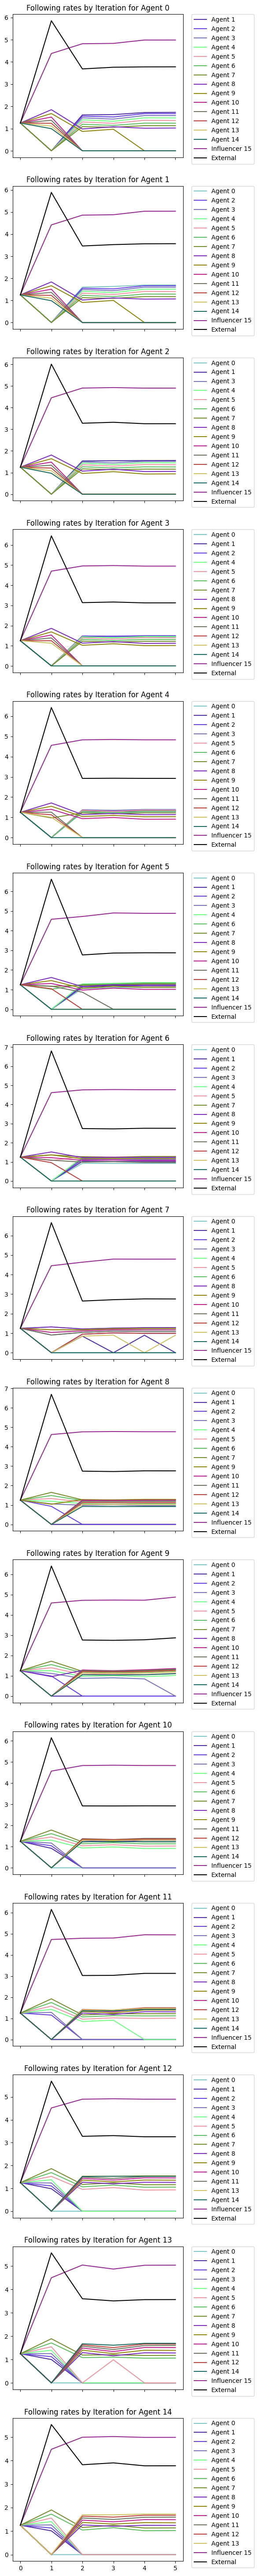

In [33]:
visualize.plot_following_rates_by_iteration(content_market.consumers, sorted(list(set(content_market.producers + content_market.influencers)), key=lambda x: x.index), agent_colors, stats.consumer_stats)

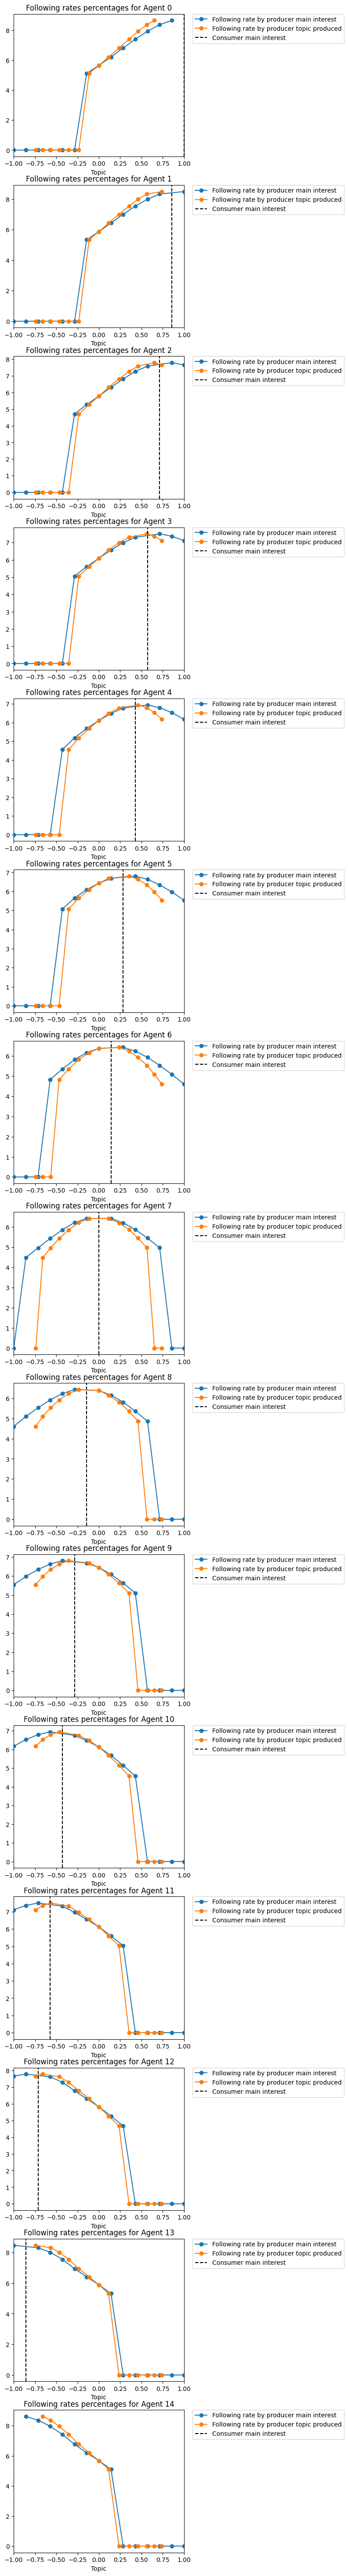

In [34]:
visualize.plot_agent_following_rates(content_market.consumers, stats.consumer_stats, agent_colors)

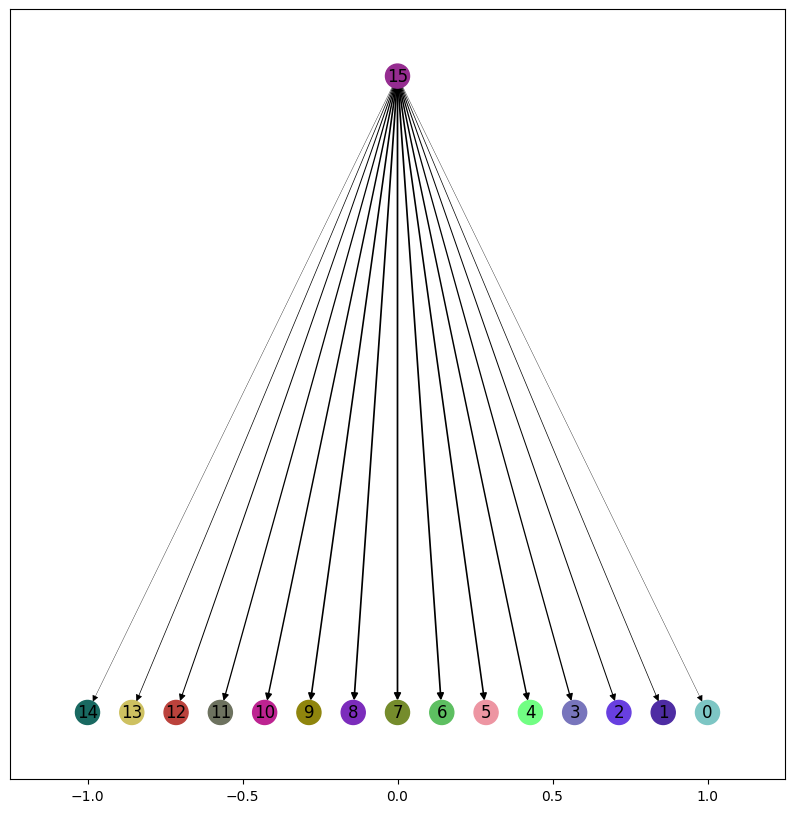

In [35]:
visualize.visualize_influencer(content_market, stats.influencer_stats[content_market.influencers[0].index], agent_colors)

In [36]:
import importlib
importlib.reload(visualize)

<module 'visualize' from '/Users/gabeguralnick/git/content-market-experiment/visualize.py'>

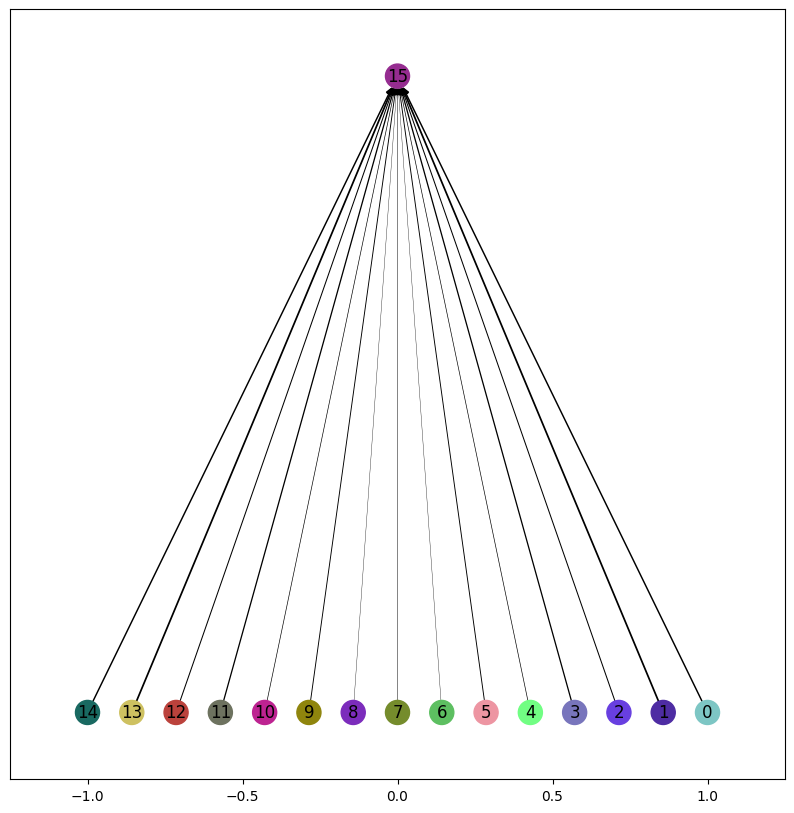

In [37]:
visualize.visualize_influencer_followers(content_market, stats.consumer_stats, agent_colors)

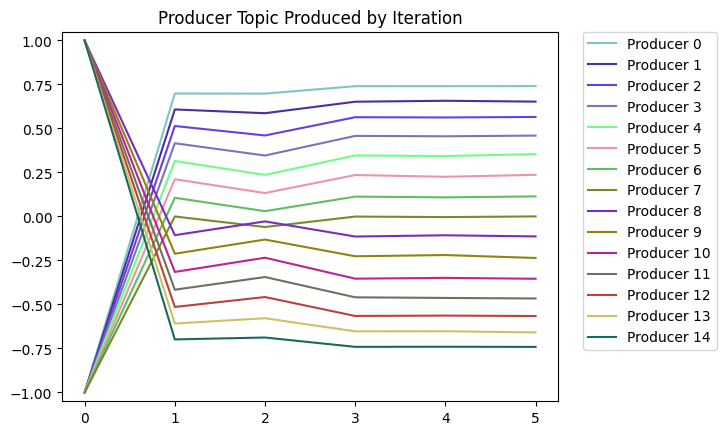

In [38]:
visualize.plot_producer_topic_produced_by_iteration("Producer Topic Produced by Iteration", content_market.producers, content_market.consumers, agent_colors, stats.producer_stats, False)

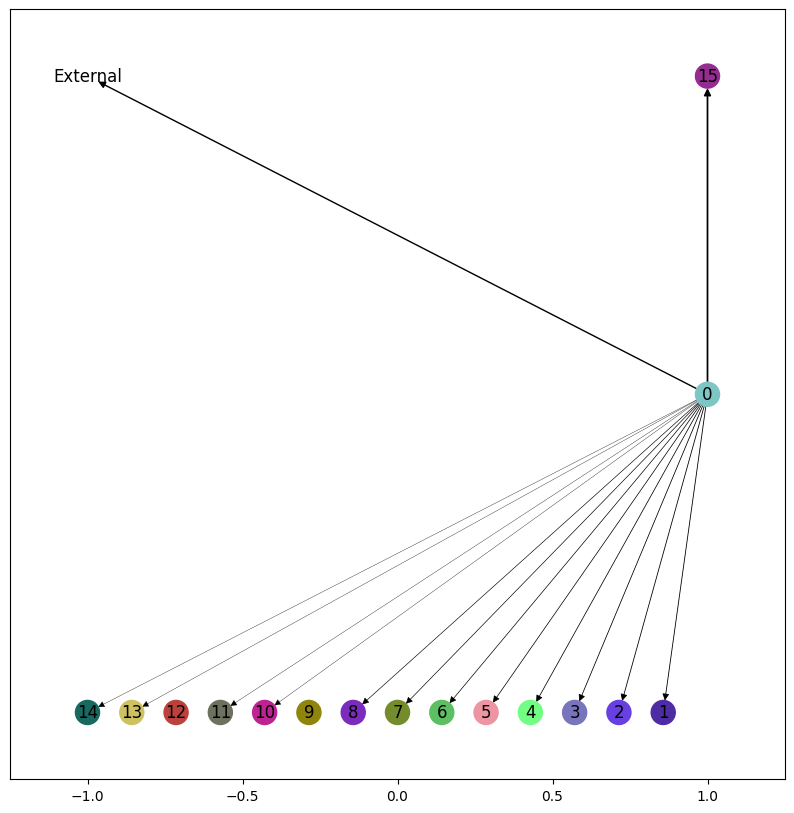

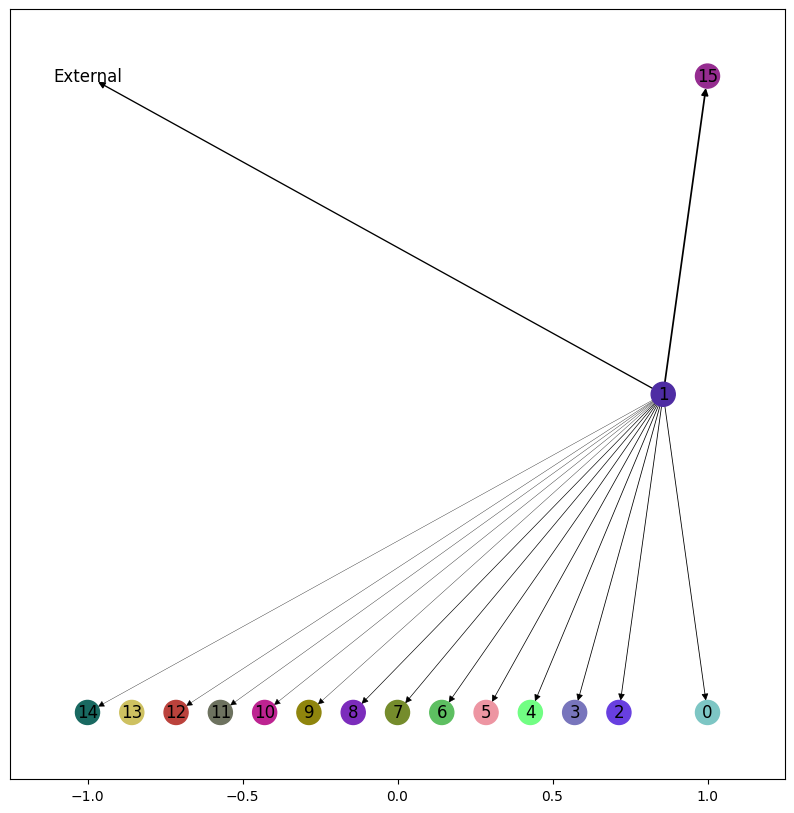

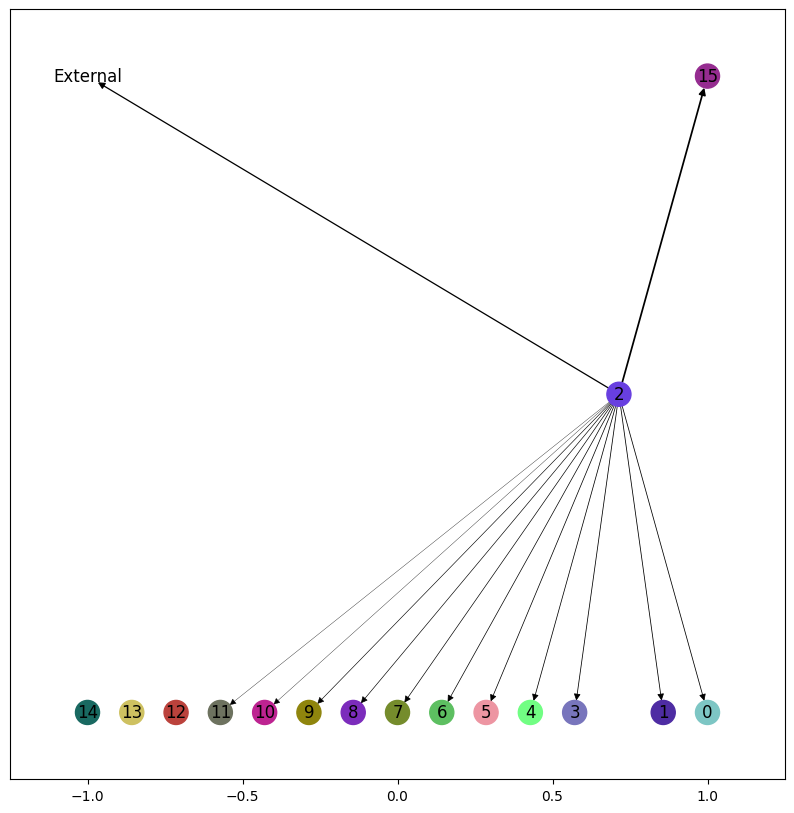

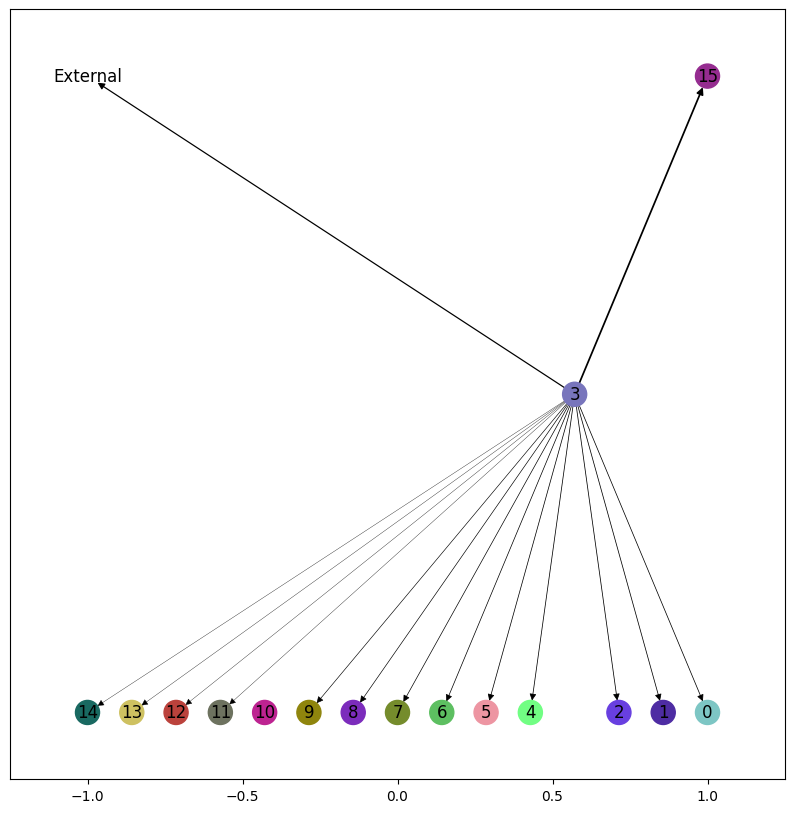

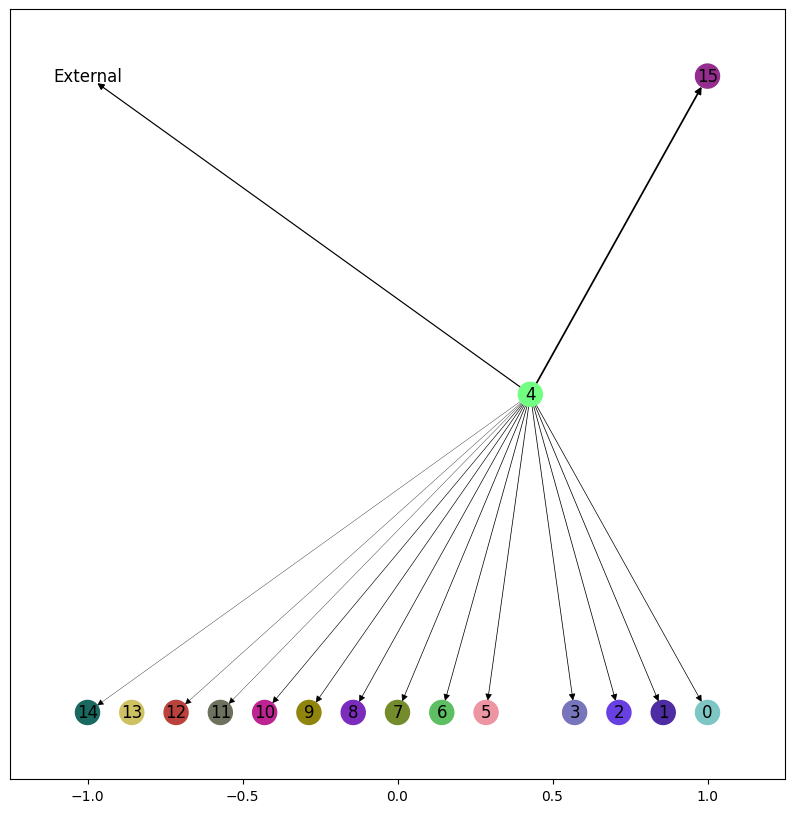

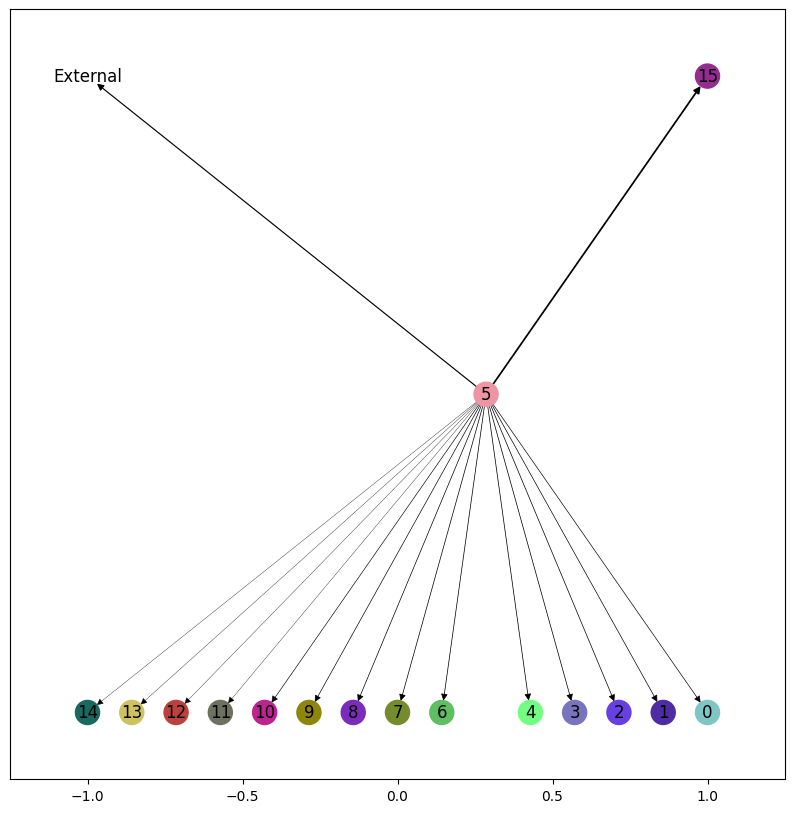

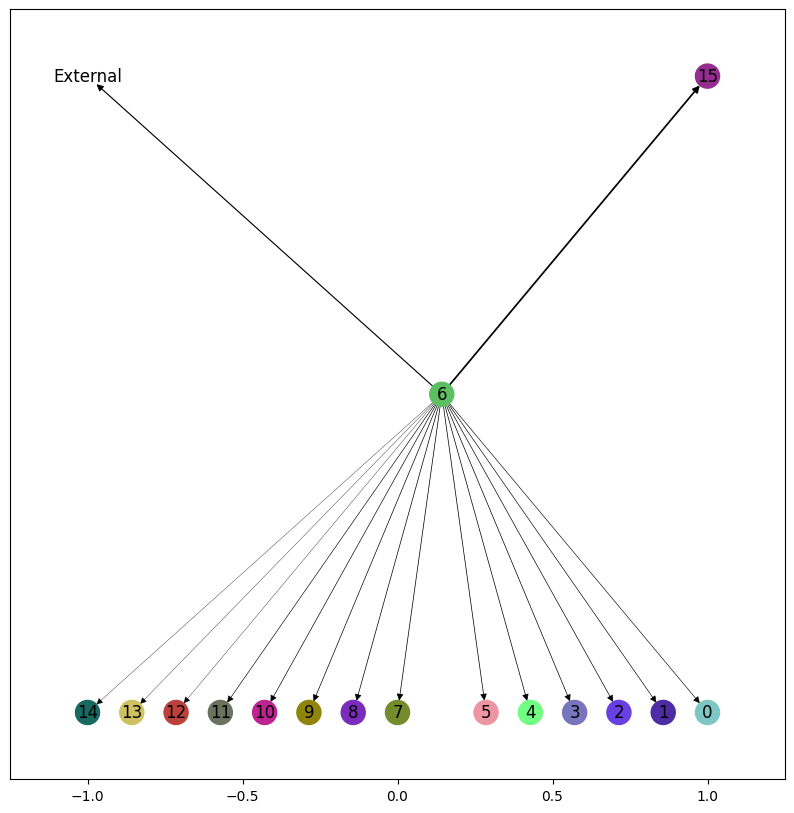

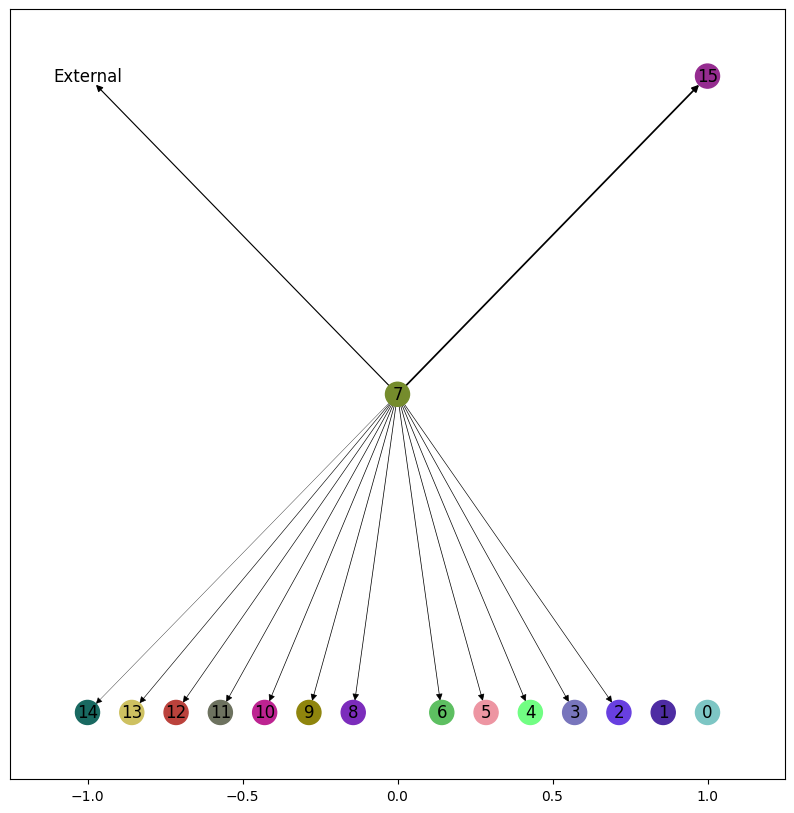

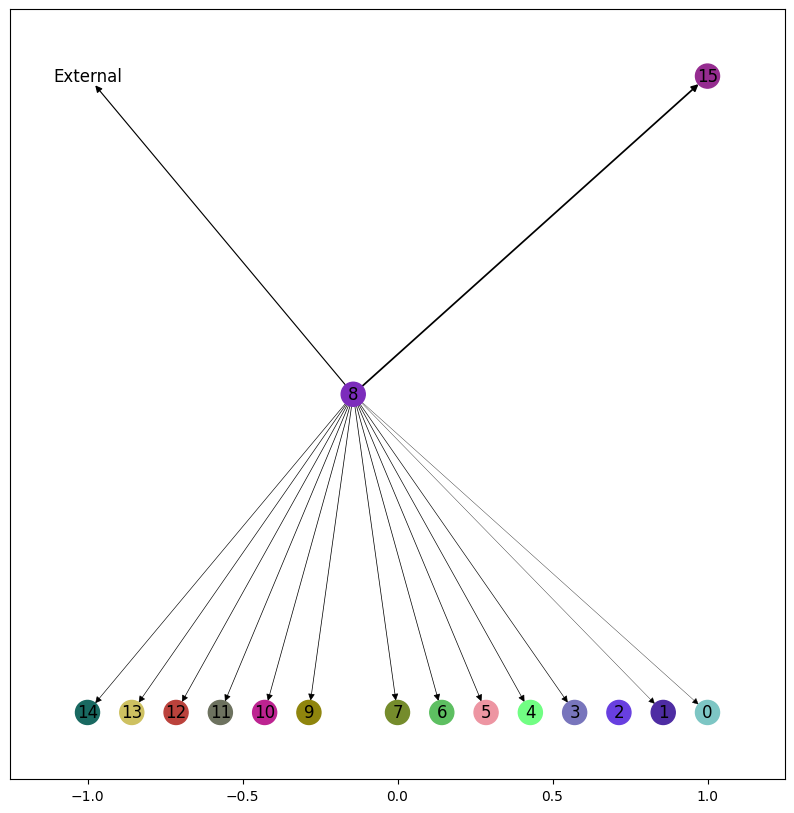

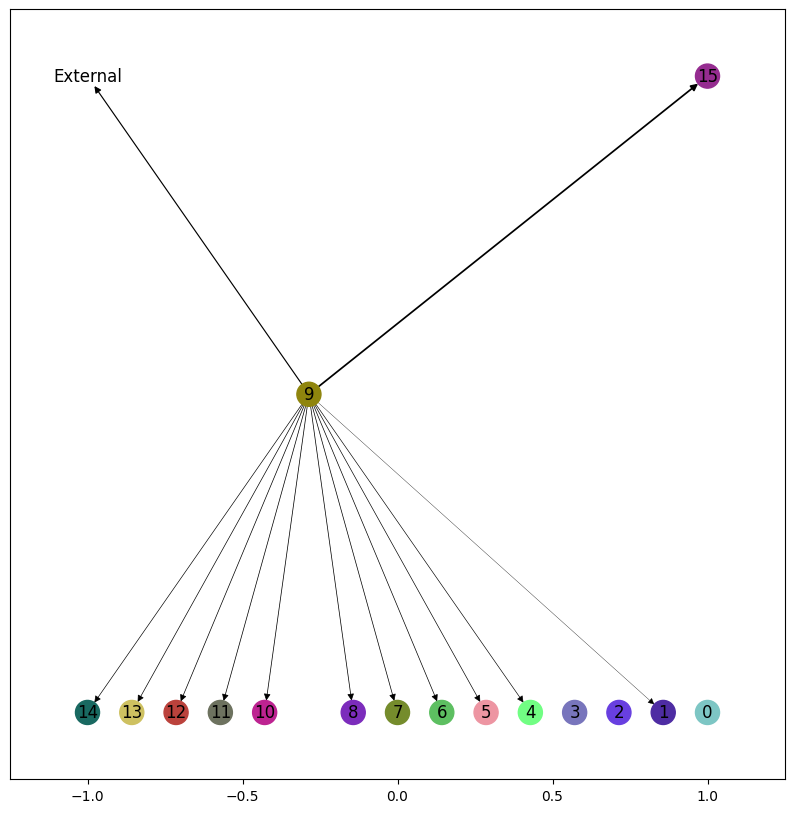

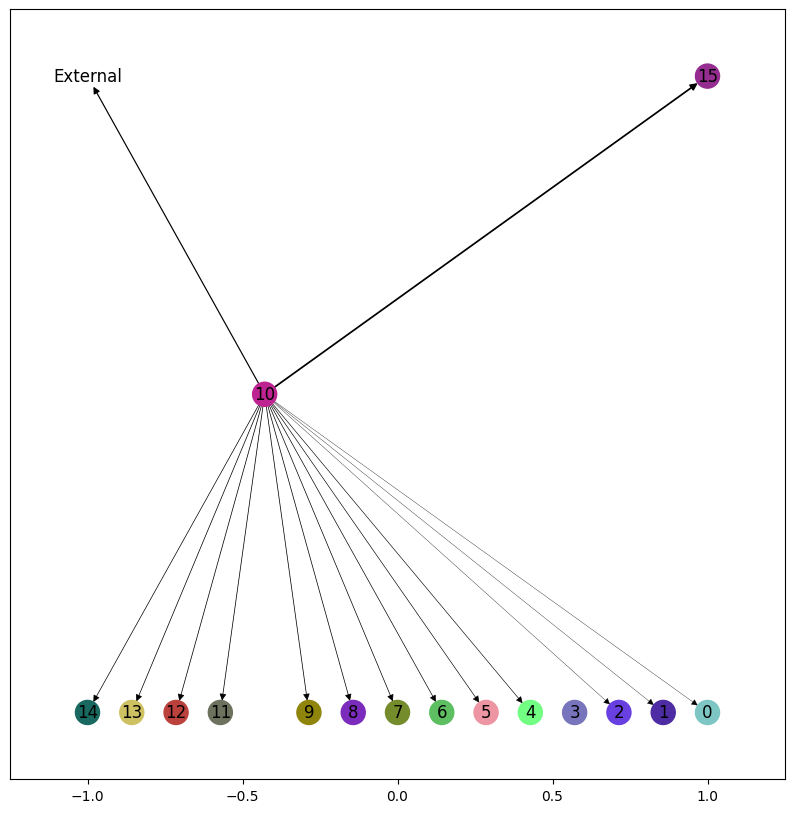

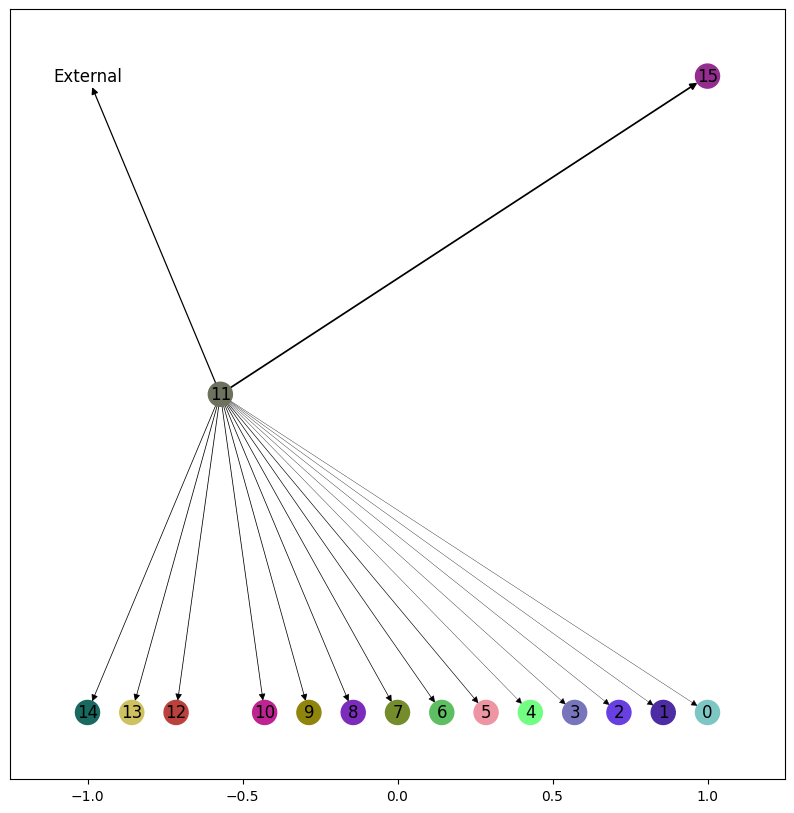

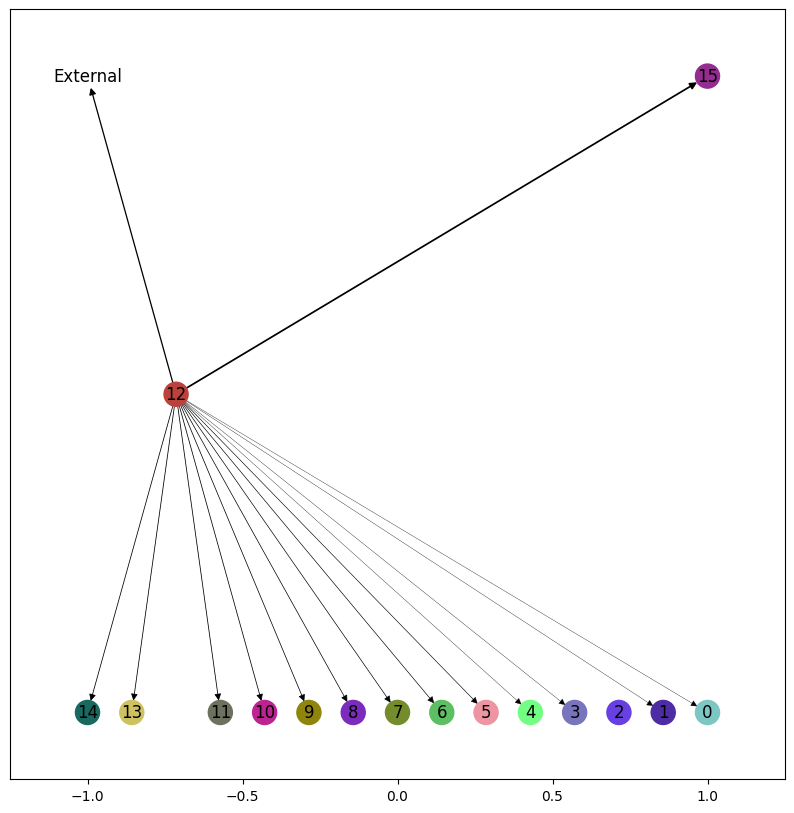

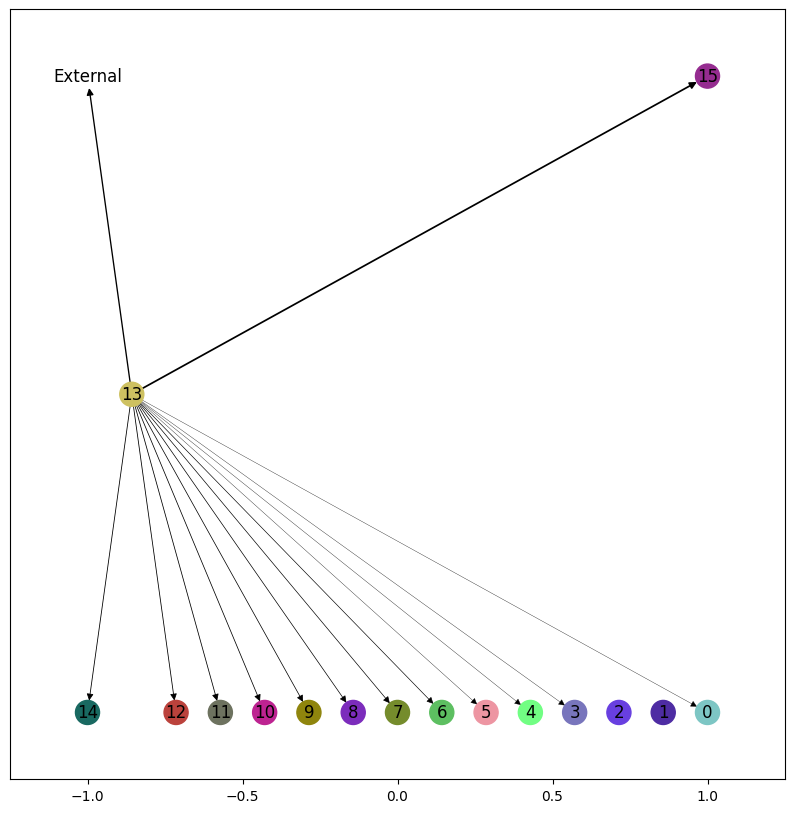

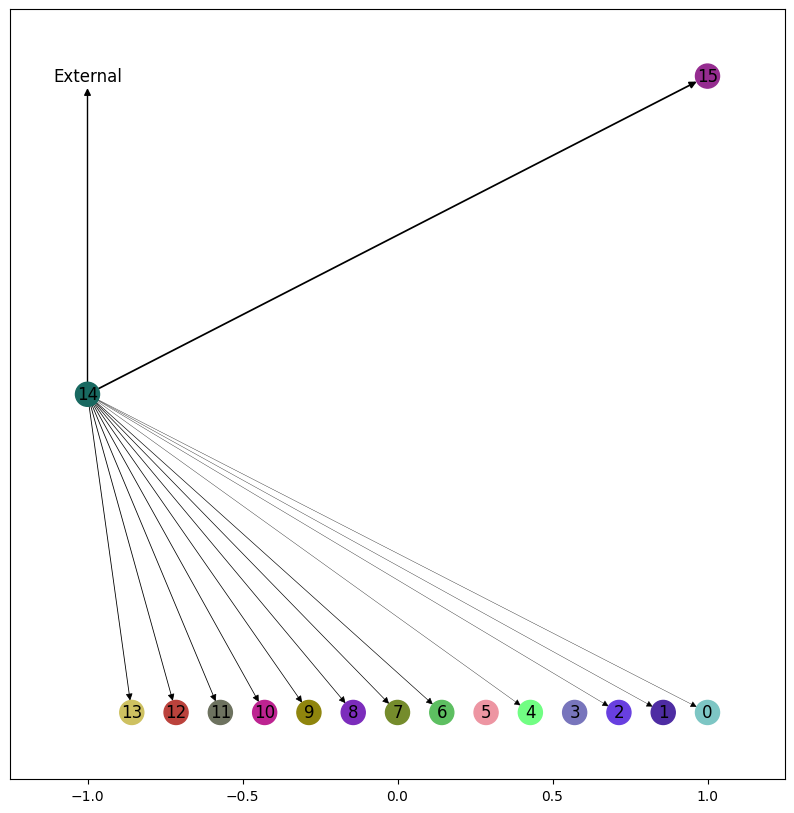

In [39]:
for consumer in content_market.consumers:
    visualize.visualize_consumer(content_market, stats.consumer_stats[consumer.index], agent_colors)

In [40]:
stats.to_dict()

{'num_iterations': 5,
 'total_consumer_utility': [0,
  146.87415786083992,
  163.77302903469283,
  165.19877710796615,
  165.32657035877492,
  165.36283846670065],
 'total_producer_utility': [0,
  108.6090948139491,
  131.23167372249253,
  132.58096357879413,
  132.68116735902032,
  132.69183754784748],
 'total_influencer_utility': [0,
  79.18689170559313,
  80.12408082083451,
  80.5118544918058,
  80.59722329917594,
  80.61404469033974],
 'total_social_welfare': [0,
  146.87415786083992,
  163.77302903469283,
  165.19877710796615,
  165.32657035877492,
  165.36283846670065],
 'average_consumer_rate_change': [0,
  6.855932624596382,
  5.075304845014961,
  0.3129934053996187,
  0.4744700750996818,
  0.15416607071873942],
 'average_producer_topic_change': [0,
  1.3826400991664487,
  0.056470336820868654,
  0.08849693867340792,
  0.003673907201769641,
  0.005643720446767786],
 'average_influencer_rate_change': [0,
  1.7450415887421784,
  1.2734833340797729,
  0.016864680530082075,
  0.022

In [41]:
sorted([c.main_interest for c in content_market.consumers])

[array([-1.]),
 array([-0.85714286]),
 array([-0.71428571]),
 array([-0.57142857]),
 array([-0.42857143]),
 array([-0.28571429]),
 array([-0.14285714]),
 array([0.]),
 array([0.14285714]),
 array([0.28571429]),
 array([0.42857143]),
 array([0.57142857]),
 array([0.71428571]),
 array([0.85714286]),
 array([1.])]